# Column Densities with AbsComponent

In [1]:
%matplotlib inline

In [2]:
# imports
try:
    import seaborn as sns; sns.set_style("white")
except:
    pass

from linetools.isgm import abscomponent as lt_abscomp
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
#
import imp
lt_path = imp.find_module('linetools')[1]

/Users/xavier/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Read Spec

In [3]:
xspec = lsio.readspec(lt_path+'/spectra/tests/files/UM184_nF.fits')

## Generate a few AbsLines

In [4]:
SiIItrans = ['SiII 1260', 'SiII 1304', 'SiII 1526', 'SiII 1808']

In [5]:
abslines = []
for trans in SiIItrans:
    iline = AbsLine(trans)
    iline.attrib['z'] = 2.92939
    iline.analy['vlim'] = [-250.,80.]*u.km/u.s
    iline.analy['spec'] = xspec
    abslines.append(iline)
#
abslines

linetools.lists.parse: Reading linelist --- 
   /Users/xavier/local/Python/linetools/linetools/data/lines/morton03_table2.fits.gz
linetools.lists.parse: Reading linelist --- 
   /Users/xavier/local/Python/linetools/linetools/data/lines/morton00_table2.fits.gz
linetools.lists.parse: Reading linelist --- 
   /Users/xavier/local/Python/linetools/linetools/data/lines/verner94_tab6.fits


linetools.lists.parse: Reading linelist --- 
   /Users/xavier/local/Python/linetools/linetools/data/lines/EUV_lines.ascii
read_sets: Using set file -- 
  /Users/xavier/local/Python/linetools/linetools/lists/sets/llist_v0.3.ascii


[[AbsLine: SiII 1260, wrest=1260.4221 Angstrom],
 [AbsLine: SiII 1304, wrest=1304.3702 Angstrom],
 [AbsLine: SiII 1526, wrest=1526.7070 Angstrom],
 [AbsLine: SiII 1808, wrest=1808.0129 Angstrom]]

## Generate the Component

In [6]:
reload(lt_abscomp)
abscomp = lt_abscomp.AbsComponent.from_abslines(abslines)

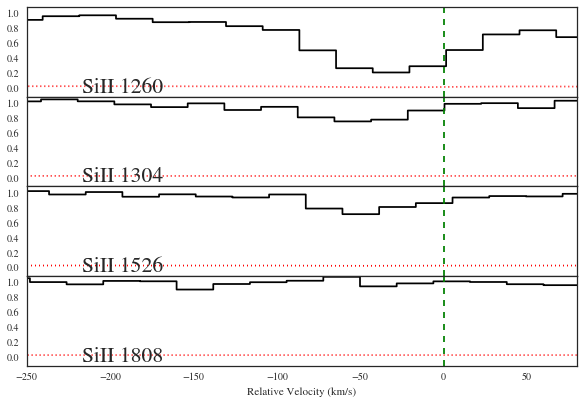

In [7]:
abscomp.stack_plot()

## Measure Column Densities

In [8]:
abscomp.measure_colm(redo_indiv=True)

In [9]:
abscomp

[AbsComponent: 00:00:00 +00:00:00, Zion=(14,2), z=2.92939, logN=13.5944, sigN=0.0144997]

In [11]:
for iline in abscomp._abslines:
    print(iline.wrest, iline.attrib['flagN'], iline.attrib['logN'], iline.attrib['sig_logN'])

(<Quantity 1260.4221 Angstrom>, 1, 13.588374631008852, 0.015074558585718052)
(<Quantity 1304.3702 Angstrom>, 1, 13.770868841899777, 0.086201339463221296)
(<Quantity 1526.707 Angstrom>, 1, 13.670736035998091, 0.064085769638602866)
(<Quantity 1808.0129 Angstrom>, 3, 0.0, 0.50977321571018408)


## COG